# 01 — Coleta de Dados de Criptomoedas
Este notebook realiza a coleta de dados históricos de preços, volume e market cap de diversas criptomoedas utilizando a API CoinGecko.

**Etapas principais:**
- Definição da lista de criptomoedas
- Função para coletar dados via API
- Loop de coleta para cada moeda
- Consolidação dos dados em um único DataFrame
- Salvamento do arquivo bruto para uso posterior
- Visualização inicial dos dados coletados

In [ ]:
import requests
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt


## Lista de Criptomoedas
Definição das criptomoedas que serão analisadas no projeto. A escolha inclui ativos de diferentes perfis e tamanhos de mercado para enriquecer a análise de risco.

In [11]:
# Lista de criptomoedas que usaremos no projeto
coin_list = [
    "bitcoin", "ethereum", "solana", "kamino", "ethena", "pendle", "lido-dao",
    "aerodrome-finance", "virtual-protocol", "chainlink"
]

coin_list


['bitcoin',
 'ethereum',
 'solana',
 'kamino',
 'ethena',
 'pendle',
 'lido-dao',
 'aerodrome-finance',
 'virtual-protocol',
 'chainlink']

## Função de Coleta via API CoinGecko
Implementação da função responsável por buscar os dados históricos de cada criptomoeda, incluindo preço, volume e market cap.

In [12]:
def fetch_price_history_coin_gecko(coin_id, days=120):
    """
    Função para coletar dados de uma criptomoeda via API CoinGecko.

    Retorna:
      - timestamp
      - price
      - volume
      - market_cap
    """

    url = f'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart'
    params = {'vs_currency': 'usd', 'days': days}

    r = requests.get(url, params=params)
    
    if r.status_code != 200:
        raise Exception(f"Erro ao buscar {coin_id}: {r.text}")

    data = r.json()

    df = pd.DataFrame({
        'timestamp': [p[0] for p in data['prices']],
        'price': [p[1] for p in data['prices']],
        'volume': [v[1] for v in data['total_volumes']],
        'market_cap': [m[1] for m in data['market_caps']]
    })

    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['coin'] = coin_id

    return df


## Coleta dos Dados para Cada Criptomoeda
Loop para baixar os dados de cada moeda da lista, consolidando os resultados em uma lista para posterior união. Inclui pausa para evitar bloqueio da API.

In [13]:
all_data = []

for coin in coin_list:
    print(f"Baixando dados de {coin}...")
    df = fetch_price_history_coin_gecko(coin, days=60)
    all_data.append(df)
    time.sleep(60)  # Pausa para evitar rate limiting

print("\nColeta finalizada!")


Baixando dados de bitcoin...
Baixando dados de ethereum...
Baixando dados de solana...
Baixando dados de kamino...
Baixando dados de ethena...
Baixando dados de pendle...
Baixando dados de lido-dao...
Baixando dados de aerodrome-finance...
Baixando dados de virtual-protocol...
Baixando dados de chainlink...

Coleta finalizada!


## Consolidação dos Dados
União dos dados coletados em um único DataFrame para facilitar análises e processamento nas etapas seguintes.

In [14]:
price_history = pd.concat(all_data, ignore_index=True)
price_history.head()


,timestamp,price,volume,market_cap,coin
0,2025-09-30 17:01:29.261,112843.613034,5.532786e+10,2.248248e+12,bitcoin
1,2025-09-30 18:02:02.079,113343.475429,5.558492e+10,2.259015e+12,bitcoin
2,2025-09-30 19:02:18.018,113644.471873,5.554536e+10,2.264727e+12,bitcoin
3,2025-09-30 20:02:25.069,114491.910339,5.674079e+10,2.278936e+12,bitcoin
4,2025-09-30 21:02:37.088,114618.579149,5.744427e+10,2.284540e+12,bitcoin


## Verificação dos Dados Coletados
Contagem de registros por criptomoeda para garantir que todas foram coletadas corretamente e possuem dados suficientes para análise.

In [15]:
price_history['coin'].value_counts()


coin
bitcoin              1441
ethereum             1441
solana               1441
kamino               1441
ethena               1441
pendle               1441
lido-dao             1441
aerodrome-finance    1441
virtual-protocol     1441
chainlink            1441
Name: count, dtype: int64

## Salvamento do Arquivo Bruto
Exportação dos dados coletados para um arquivo CSV na pasta `data/raw/`, permitindo o uso nas próximas etapas.

In [ ]:
output_path = "../data/raw/prices_raw.csv"
price_history.to_csv(output_path, index=False)

print("Arquivo salvo em:", output_path)


Arquivo salvo em: ../data/raw/prices_raw.csv


## Visualização Inicial dos Dados
Exemplo de gráfico para visualizar o histórico de preços de uma das criptomoedas coletadas, auxiliando na validação dos dados e na compreensão do comportamento do ativo.

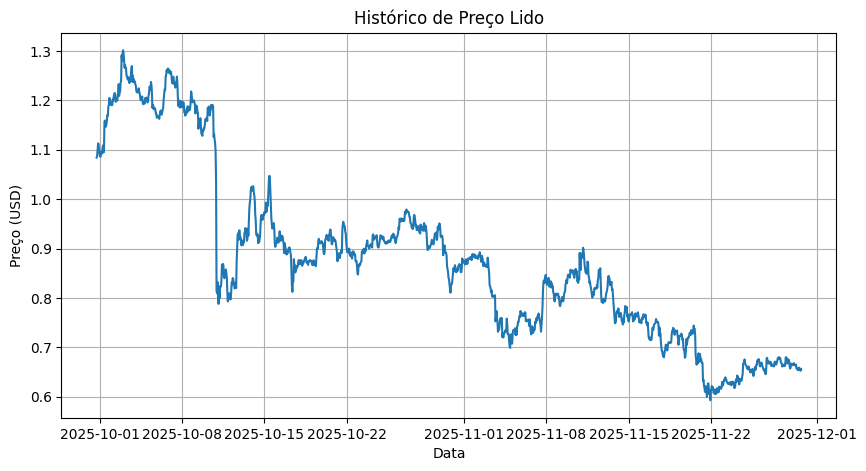

In [ ]:
plt.figure(figsize=(10,5))

cripto = price_history[price_history['coin'] == 'lido-dao']

plt.plot(cripto['timestamp'], cripto['price'])
plt.title("Histórico de Preço")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.grid(True)
plt.show()
